## **Importing the libraries and dataset**

In [ ]:
#PRATIKSHAMEHTA
#D87
#60009220172
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv('/content/Iris.csv')
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## **Split the dataset**

In [ ]:
# Splitting the dataset into features and target variable
X = df1.drop('Species', axis=1)
y = df1['Species']

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Create a classifier**

In [ ]:
# Creating a decision tree classifier
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_gini.fit(X_train, y_train)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

## **Evaluation**

In [ ]:
# Making predictions
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

In [ ]:
# Calculating and printing the confusion matrix and classification report for Gini
print("Decision Tree - Gini")
cm_gini = confusion_matrix(y_test, y_pred_gini)
print("\nConfusion Matrix:")
print(cm_gini)
print("\nClassification Report:")
print(sklearn.metrics.classification_report(y_test, y_pred_gini))

Decision Tree - Gini

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
# Calculating and printing the confusion matrix and classification report for Entropy
print("\nDecision Tree - Entropy")
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
print("\nConfusion Matrix:")
print(cm_entropy)
print("\nClassification Report:")
print(sklearn.metrics.classification_report(y_test, y_pred_entropy))


Decision Tree - Entropy

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## **Plotting the tree**

In [ ]:
pip install graphviz

In [ ]:
pip install pydotplus

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

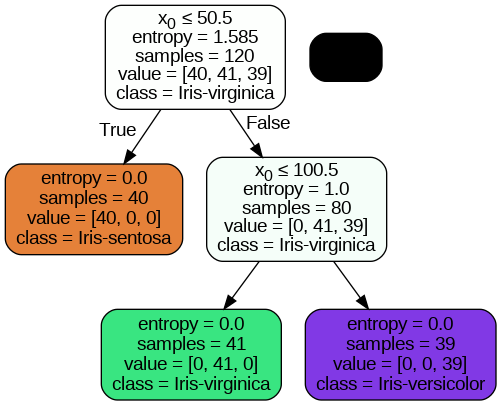

In [ ]:
# Export the decision tree for clf_entropy
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO
dot_data_entropy = StringIO()
export_graphviz(clf_entropy, out_file=dot_data_entropy, filled=True,
                rounded=True, special_characters=True, class_names=['Iris-sentosa','Iris-virginica','Iris-versicolor'])
graph_entropy = pydotplus.graph_from_dot_data(dot_data_entropy.getvalue())
graph_entropy.write_png('iris_entropy.png')
Image(graph_entropy.create_png())

# **A code to show overfitting in the decision tree classifier**

## **Making a Synthetic Dataset**

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [ ]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=42)
print(X.shape, y.shape)

(10000, 20) (10000,)


## **Splitting synthetic dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf2 = DecisionTreeClassifier()
clf2 = clf2.fit(X_train, y_train)

In [ ]:
y_preds = clf2.predict(X_test)

## **Pruning**

In [ ]:
train_scores,test_scores=list(),list()
values = [i for i in range(1,21)]
for i in values:
  model = DecisionTreeClassifier(max_depth=i)
  model.fit(X_train,y_train)
  train_yhat=model.predict(X_train)
  train_acc = accuracy_score(y_train,train_yhat)

  train_scores.append(train_acc)
  test_yhat = model.predict(X_test)
  test_acc= accuracy_score(y_test,test_yhat)
  test_scores.append(test_acc)
  print('>%d,train:%.3f,test:%.3f'%(i,train_acc,test_acc))

>1,train:0.779,test:0.774
>2,train:0.847,test:0.841
>3,train:0.874,test:0.866
>4,train:0.898,test:0.876
>5,train:0.907,test:0.886
>6,train:0.933,test:0.912
>7,train:0.946,test:0.922
>8,train:0.953,test:0.927
>9,train:0.963,test:0.923
>10,train:0.970,test:0.930
>11,train:0.979,test:0.931
>12,train:0.986,test:0.925
>13,train:0.992,test:0.923
>14,train:0.994,test:0.924
>15,train:0.996,test:0.923
>16,train:0.998,test:0.925
>17,train:0.999,test:0.919
>18,train:1.000,test:0.924
>19,train:1.000,test:0.920
>20,train:1.000,test:0.921


## **Visualizing Training vs Testing Accuracy**

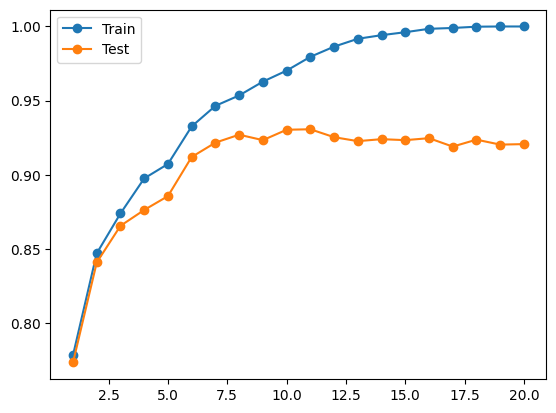

In [ ]:
pyplot.plot(values,train_scores,'-o',label='Train')
pyplot.plot(values,test_scores,'-o',label='Test')
pyplot.legend()
pyplot.show()

When max depth is set to 11, the model gives the best testing accuracy, after which if the depth is increased, the testing accuracy will decrease and training accuracy will increase leading to overfitting.

# **Dataset - 3 : Breast Cancer**

## **Exploring the dataset**

In [ ]:
data = pd.read_csv('/content/Breast_cancer_data.csv')
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


## **Splitting the dataset**

X = feature variables

y = target variable

In [ ]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## **Fitting the model**

Calling the DecisionTreeClassifier instance and storing it in mdl.

Then, evaluating the model on testing data

In [ ]:
mdl = DecisionTreeClassifier()
mdl = mdl.fit(X_train, y_train)

y_preds = mdl.predict(X_test)

## **Performance Evaluation**

In [ ]:
print(sklearn.metrics.classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        63
           1       0.93      0.87      0.90       108

    accuracy                           0.88       171
   macro avg       0.87      0.88      0.87       171
weighted avg       0.88      0.88      0.88       171



## **Visualizations**

### **Graph from Gini**

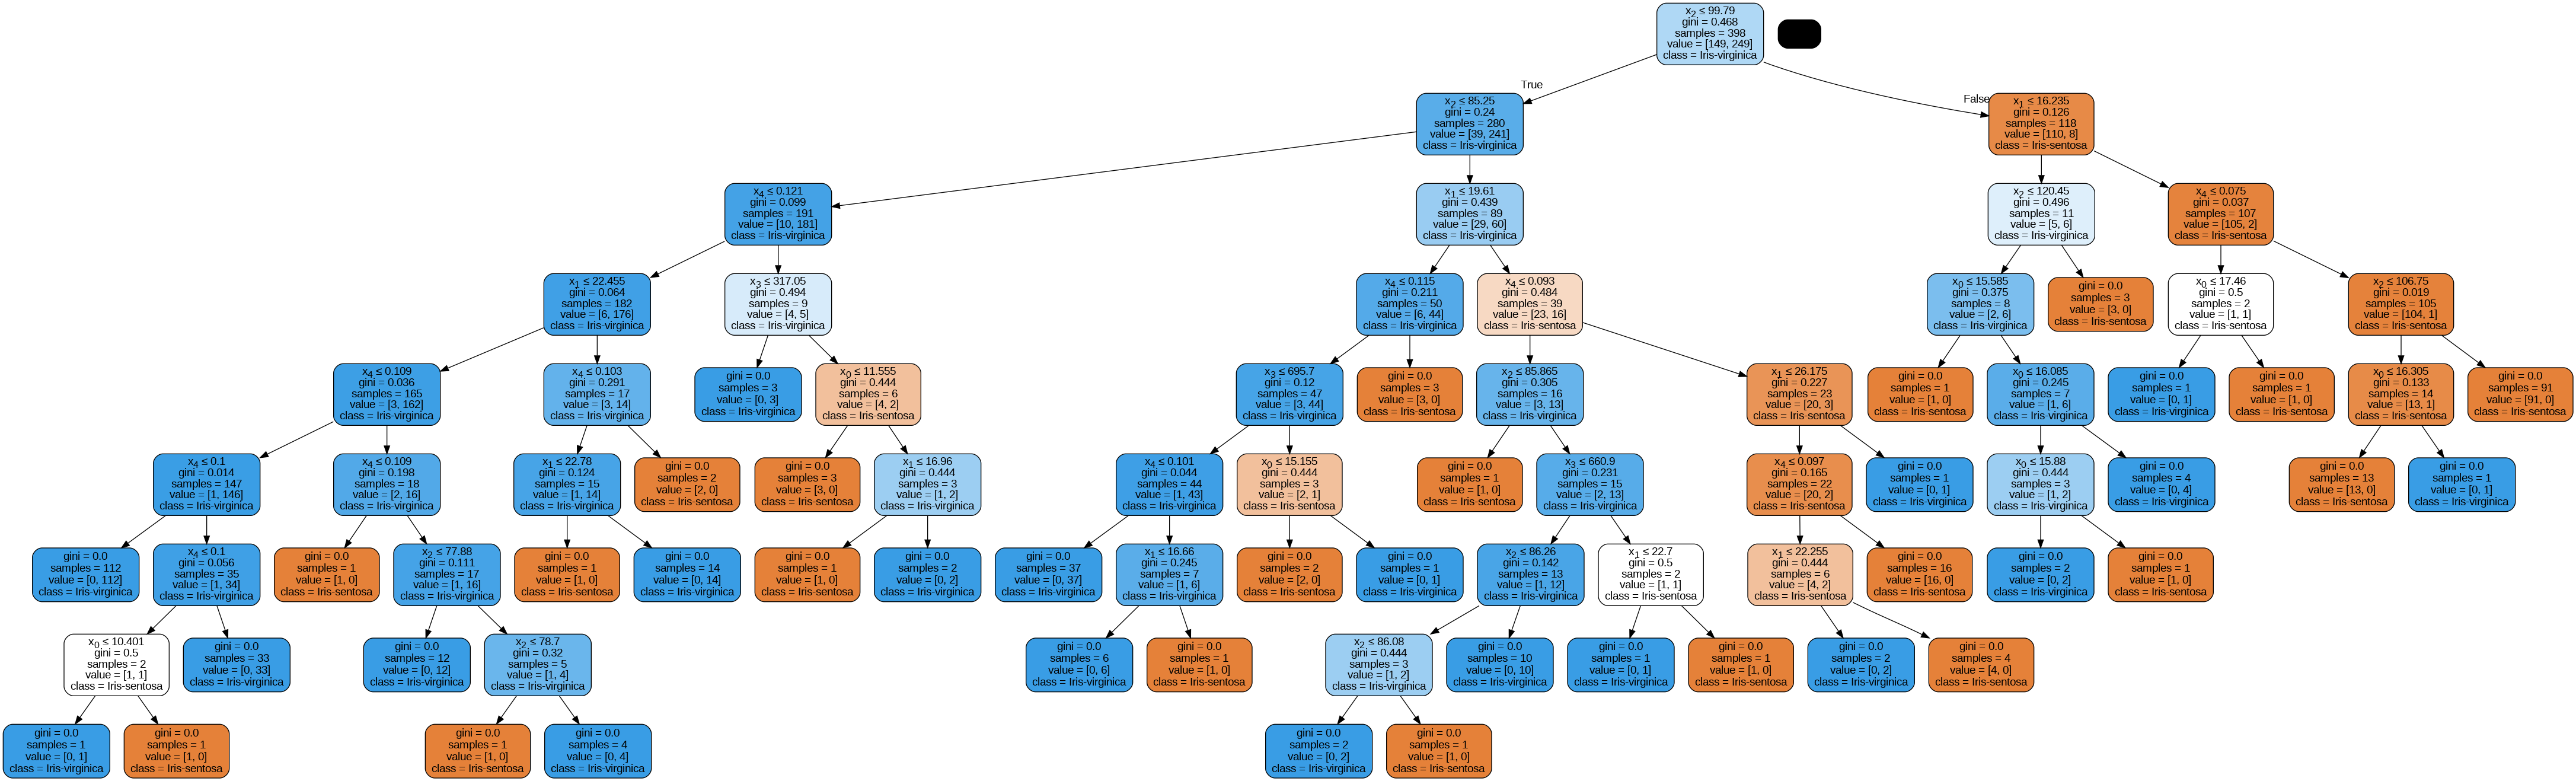

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO
dot_data=StringIO()
export_graphviz(mdl, out_file=dot_data, filled=True,
                rounded=True, special_characters=True, class_names=['Iris-sentosa','Iris-virginica','Iris-versicolor'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('breast_cancer.png')
Image(graph.create_png())

### ** Training vs Testing Accuracy**

In [ ]:
train_scores, test_scores= list(), list()
values = [i for i in range(1,12)]
for i in values:
  model = DecisionTreeClassifier(max_depth=i)
  model.fit(X_train,y_train)
  train_yhat=model.predict(X_train)
  train_acc = accuracy_score(y_train,train_yhat)

  train_scores.append(train_acc)
  test_yhat = model.predict(X_test)
  test_acc= accuracy_score(y_test,test_yhat)
  test_scores.append(test_acc)
  print('>%d,train:%.3f,test:%.3f'%(i,train_acc,test_acc))

>1,train:0.882,test:0.906
>2,train:0.884,test:0.883
>3,train:0.910,test:0.906
>4,train:0.952,test:0.924
>5,train:0.970,test:0.918
>6,train:0.982,test:0.918
>7,train:0.992,test:0.877
>8,train:1.000,test:0.901
>9,train:1.000,test:0.877
>10,train:1.000,test:0.865
>11,train:1.000,test:0.871


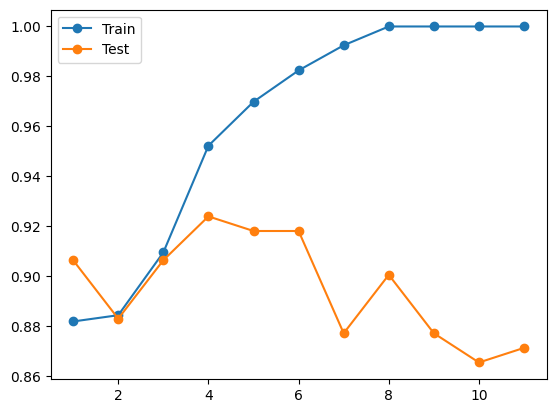

In [ ]:
pyplot.plot(values,train_scores,'-o',label='Train')
pyplot.plot(values,test_scores,'-o',label='Test')
pyplot.legend()
pyplot.show()

When max depth is set to 6, the model gives the best testing accuracy, after which if the depth is increased, the testing accuracy will decrease and training accuracy will increase leading to overfitting.

# **Implement Decision tree regressor on Dataset 4: Car price prediction**

In [ ]:
car = pd.read_csv('/content/carprediction.csv')

In [ ]:
car.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
car.drop(columns=['Engine HP', 'Engine Cylinders','Market Category'], inplace=True)

In [ ]:
# Checking for null values in each column
null_counts = car.isnull().sum()
print("Null values in each column:")
print(null_counts)

Null values in each column:
Make                 0
Model                0
Year                 0
Engine Fuel Type     3
Transmission Type    0
Driven_Wheels        0
Number of Doors      6
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


In [ ]:
car.dropna(inplace=True)

In [ ]:
car = pd.get_dummies(car)

In [ ]:
car.head()

,Year,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Make_Acura,Make_Alfa Romeo,Make_Aston Martin,Make_Audi,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,2.0,26,19,3916,46135,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,2.0,28,19,3916,40650,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,2.0,28,20,3916,36350,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,2.0,28,18,3916,29450,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,2.0,28,18,3916,34500,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
X = car.drop('MSRP', axis=1)
y = car['MSRP']

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.3, random_state=2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
car_test = DecisionTreeRegressor()


In [ ]:
car_test = car_test.fit(train_X,train_y)

In [ ]:
y_pred = car_test.predict(test_X)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Mean Absolute Error:", mean_absolute_error(test_y, y_pred))
print("Mean Squared Error:", mean_squared_error(test_y, y_pred))
print("R-squared:", r2_score(test_y, y_pred))

Mean Absolute Error: 4471.649057072391
Mean Squared Error: 521260570.9354512
R-squared: 0.8553597484241944


In [ ]:
train_score, test_score = list(),list()
for i in range (1,21):
  model = DecisionTreeRegressor(max_depth= i)
  model.fit(train_X,train_y)
  train_yhat = model.predict(train_X)
  train_acc = r2_score(train_y,train_yhat)
  train_score.append(train_acc)
  test_yhat = model.predict(test_X)
  test_acc = r2_score(test_y,test_yhat)
  test_score.append(test_acc)
  print('%d train: %.3f,test: %.3f'% (i,train_acc,test_acc))

1 train: 0.226,test: 0.154
2 train: 0.422,test: 0.338
3 train: 0.656,test: 0.566
4 train: 0.774,test: 0.606
5 train: 0.822,test: 0.674
6 train: 0.856,test: 0.699
7 train: 0.898,test: 0.768
8 train: 0.933,test: 0.777
9 train: 0.954,test: 0.815
10 train: 0.970,test: 0.831
11 train: 0.977,test: 0.839
12 train: 0.983,test: 0.848
13 train: 0.987,test: 0.836
14 train: 0.989,test: 0.834
15 train: 0.991,test: 0.835
16 train: 0.992,test: 0.839
17 train: 0.993,test: 0.838
18 train: 0.994,test: 0.839
19 train: 0.995,test: 0.837
20 train: 0.995,test: 0.839


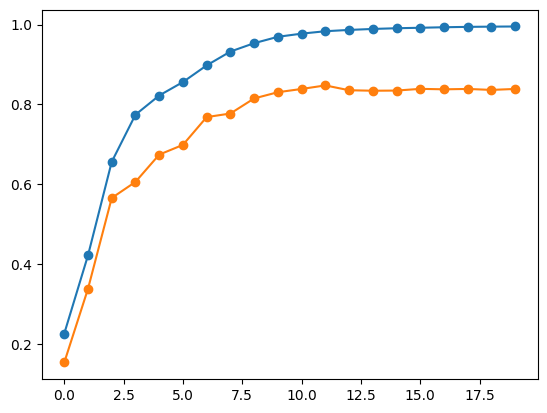

In [ ]:
plt.plot(train_score, "-o")
plt.plot(test_score, "-o")
plt.show()

The graph suggests that the decision tree model is overfitting when the max depth is set to values higher than 10. This means the model is becoming too complex and is memorizing the training data, which will lead to poor performance on unseen data.